In [1]:
from config_voting_ILSVRC12 import *
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

subset_idx = 0
inst_per_cls = 45

simmat_file = os.path.join(Feat['cache_dir'],'simmat_mthrh048_set{}.pickle'.format(subset_idx))
with open(simmat_file, 'rb') as fh:
    mat1, mat2 = pickle.load(fh)
    
print(mat1.shape)
N = mat1.shape[0]

mat = mat1
mat_full = mat + mat.T - np.ones((N,N))
# np.fill_diagonal(mat_full, 0)
W_mat = 1. - mat_full

total_cls = int(N/inst_per_cls)

(3465, 3465)


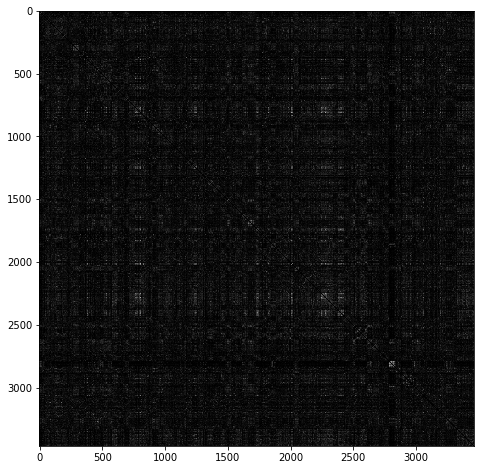

In [2]:
plt.imshow(W_mat)
plt.show()

In [3]:
for rr in np.random.randint(N,size=10):
    ref = rr
    print(ref//inst_per_cls)
    dis_rst = mat_full[rr]
    min_idx = np.argsort(dis_rst)
    tmp_ls = []
    for tt in range(5):
        match = min_idx[tt]
        print(match//inst_per_cls, end=' ')
        tmp_ls.append(match//inst_per_cls)
        
    print('')
    # print(len(np.unique(tmp_ls)))
    print('.')

40
76 46 51 64 28 
.
1
17 4 42 74 39 
.
2
75 67 67 26 53 
.
25
8 36 60 70 2 
.
4
75 32 65 4 75 
.
17
17 15 17 71 27 
.
65
21 57 42 21 32 
.
16
39 39 69 3 34 
.
2
2 26 10 2 19 
.
41
0 41 41 41 15 
.


In [4]:
from sklearn.cluster import SpectralClustering
K = 5
cls_solver = SpectralClustering(n_clusters=K,affinity='precomputed', random_state=666)
lb = cls_solver.fit_predict(W_mat)
print(len(lb))

3465


In [5]:
np.bincount(lb)/inst_per_cls

array([ 10.64444444,  11.46666667,  17.2       ,  19.91111111,  17.77777778])

In [6]:
lb_adj = []
for rr in range(int(len(lb)/inst_per_cls)):
    lb_ii = np.argmax(np.bincount(lb[rr*inst_per_cls:(rr+1)*inst_per_cls]))
    lb_rr = np.ones(inst_per_cls)*lb_ii
    lb_adj = np.concatenate([lb_adj, lb_rr])
    
lb_adj = lb_adj.astype(int)
print(np.bincount(lb_adj))

[ 720  360  720 1035  630]


In [7]:
print(np.bincount(lb_adj)/inst_per_cls)

[ 16.   8.  16.  23.  14.]


In [8]:
lb_cls = []
for rr in range(int(len(lb)/inst_per_cls)):
    lb_ii = np.argmax(np.bincount(lb[rr*inst_per_cls:(rr+1)*inst_per_cls]))
    lb_cls.append(lb_ii)
    
print(lb_cls)

[0, 4, 2, 4, 4, 2, 0, 4, 1, 0, 2, 0, 0, 3, 4, 0, 3, 1, 3, 4, 2, 0, 3, 3, 4, 3, 2, 3, 2, 2, 3, 2, 3, 0, 3, 4, 1, 0, 1, 4, 3, 0, 3, 3, 1, 4, 4, 2, 2, 3, 3, 3, 2, 1, 3, 0, 3, 3, 0, 4, 0, 3, 0, 2, 3, 1, 0, 0, 2, 2, 2, 1, 4, 2, 4, 3, 3]


In [9]:
with open('/export/home/qliu24/dataset/ILSVRC12/list_fg/cls_labels_127.txt','r') as fh:
    content = fh.readlines()
    
cls_lb = np.array([cc.strip().split()[1] for cc in content])
cls_lb = cls_lb[subset_lb==subset_idx]
for kk in range(K):
    print(cls_lb[np.array(lb_cls)==kk])

['board' 'golf_equipment' 'kit' 'home_appliance' 'bus' 'sign' 'cushion'
 'camera' 'duplicator' 'magazine' 'furniture' 'electronic_equipment'
 'structure' 'fare' 'system' 'container']
['covering' 'fruit' 'fabric' 'sauce' 'vegetable' 'pudding' 'glove'
 'sharpener']
['sled' 'ligament' 'sailing_vessel' 'drill_rig' 'rescue_equipment'
 'lacertid_lizard' 'cleaning_implement' 'diver' 'plaything' 'bird'
 'uniform' 'spacecraft' 'device' 'tool' 'oar' 'platform']
['chameleon' 'salamander' 'agamid' 'ceratopsian' 'mammal' 'litter'
 'coelenterate' 'scorpaenid' 'snake' 'arthropod' 'mollusk'
 'venomous_lizard' 'damselfish' 'fungus' 'dip' 'turtle' 'crocodile'
 'flower' 'echinoderm' 'teiid_lizard' 'iguanid' 'plectognath' 'frog']
['ganoid' 'soft-finned_fish' 'food_fish' 'military_vehicle' 'shark'
 'alligator' 'ray' 'gecko' 'worm' 'boat' 'anguid_lizard' 'passenger_train'
 'ship' 'monitor']


In [10]:
lb_cls2 = np.zeros_like(lb_cls)
for ii in range(1,K):
    lb_cls2[np.array(lb_cls)==ii]=ii+3
    
print(lb_cls, lb_cls2)

[0, 4, 2, 4, 4, 2, 0, 4, 1, 0, 2, 0, 0, 3, 4, 0, 3, 1, 3, 4, 2, 0, 3, 3, 4, 3, 2, 3, 2, 2, 3, 2, 3, 0, 3, 4, 1, 0, 1, 4, 3, 0, 3, 3, 1, 4, 4, 2, 2, 3, 3, 3, 2, 1, 3, 0, 3, 3, 0, 4, 0, 3, 0, 2, 3, 1, 0, 0, 2, 2, 2, 1, 4, 2, 4, 3, 3] [0 7 5 7 7 5 0 7 4 0 5 0 0 6 7 0 6 4 6 7 5 0 6 6 7 6 5 6 5 5 6 5 6 0 6 7 4
 0 4 7 6 0 6 6 4 7 7 5 5 6 6 6 5 4 6 0 6 6 0 7 0 6 0 5 6 4 0 0 5 5 5 4 7 5
 7 6 6]


In [11]:
print(subset_lb)
subset_lb = np.array(subset_lb)
subset_lb[subset_lb==0] = lb_cls2
print(list(subset_lb))
print(np.bincount(subset_lb))

[0 0 0 0 2 2 0 0 0 0 0 2 0 0 0 2 3 0 0 2 0 0 0 0 3 2 1 0 3 0 0 0 0 0 2 0 0
 2 2 0 3 0 3 2 3 3 0 3 0 2 0 0 0 0 2 0 0 0 0 0 0 0 3 3 3 0 1 3 2 0 0 3 1 3
 0 0 0 0 0 2 0 2 0 1 3 2 2 0 2 1 0 0 0 0 0 0 3 0 0 2 1 0 3 2 0 2 0 0 0 0 3
 2 2 0 3 1 0 0 0 3 0 0 0 0 0 0 0]
[0, 7, 5, 7, 2, 2, 7, 5, 0, 7, 4, 2, 0, 5, 0, 2, 3, 0, 6, 2, 7, 0, 6, 4, 3, 2, 1, 6, 3, 7, 5, 0, 6, 6, 2, 7, 6, 2, 2, 5, 3, 6, 3, 2, 3, 3, 5, 3, 5, 2, 6, 5, 6, 0, 2, 6, 7, 4, 0, 4, 7, 6, 3, 3, 3, 0, 1, 3, 2, 6, 6, 3, 1, 3, 4, 7, 7, 5, 5, 2, 6, 2, 6, 1, 3, 2, 2, 6, 2, 1, 5, 4, 6, 0, 6, 6, 3, 0, 7, 2, 1, 0, 3, 2, 6, 2, 0, 5, 6, 4, 3, 2, 2, 0, 3, 1, 0, 5, 5, 3, 5, 4, 7, 5, 7, 6, 6]
[16  7 23 20  8 16 23 14]


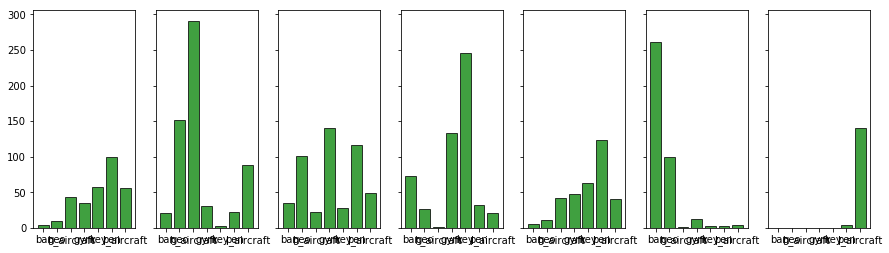

In [16]:
f, axes = plt.subplots(1,K, sharex=True, sharey=True, figsize=(15,4))
objects = ['bar', 'geological_formation', 'heavier-than-air_craft', 'gymnastic_apparatus', 'key', 'pen','lighter-than-air_craft']
objects_s = ['bar','geo','h_aircraft','gym','key','pen','l_aircraft']
types = np.concatenate([[oo for nn in range(inst_per_cls)] for oo in objects_s])
pos = np.arange(len(objects_s))
axes[0].set_xticks(pos)
axes[0].set_xticklabels(objects_s)
for k in range(K):
    freq = []
    for oo in objects_s:
        freq.append(sum(np.array(types)[lb==k]==oo))
        
    axes[k].bar(pos, freq, color='green',alpha=0.75, edgecolor='k')

plt.show()

In [17]:
K = 3
cls_solver = SpectralClustering(n_clusters=K,affinity='precomputed', random_state=666)
lb = cls_solver.fit_predict(W_mat[2000:2400,2000:2400])
np.bincount(lb)

array([198,  68, 134])